In [1]:
#global import
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.linalg import inv,pinvh,eig,eigh
from scipy.stats import linregress
%matplotlib inline
# local import
from code.slope import Slope
from code.slope import DataGen
from code.slope import Solver
from code.slope import MatrixGen

# Discretization method

## Trapeze, finite difference
On approxime la fonction $x$ par sa valeur aux points $t_i = ih$ pour $ 1 \leq i \leq n$ soit n points (la valeur en 0 disparait mais comme la dérivée est nulle on suppose que x(0) = x(h) ).
$$
\begin{split}
 T_a x (t_i) = & \; \int_0^{t_i}(t_i -s)^{a-1}   x(s) \mathrm{d} s \\
             = & \; \sum_{j=1}^i \frac{x(t_j)+x(t_{j-1})}{2} 
                      \int_{t_{j-1}}^{t_{j}}(t_i -s)^{a-1} \mathrm{d} s + O(\delta t) \\
            = & \;  \sum_{j=1}^i \frac{x(t_j)+x(t_{j-1})}{2a} 
                      ((t_i -t_{j-1})^{a} - (t_i -t_{j})^{a}) + O(\delta t)
            \; ,
\end{split}
$$
and with $t_i = i \delta t $,
$$
(\widetilde{T}_a)_{i,j}
= 
\begin{cases}
\; \displaystyle \frac{(\delta t)^a}{2a}
     \left( (i-j+1)^{a} - (i-j-1)^{a}  \right) & j<i \; ,\\
     \\
     \; \displaystyle \frac{(\delta t)^a}{a}   &j=i=1  \; ,\\
\\
\; \displaystyle \frac{(\delta t)^a}{2a}   & j=i , \; i \neq 1 \; ,\\
\\
\; 0 & j>i \; .
\end{cases}
$$


On a deux façons d'approximer $B$ et $D$.

INVERSE : On utilise la définition de $B$
$$
B = (T^T T)^{-1}
\; .
$$

EXPLICIT : on approxime $B$ avec des différences finies. Ensuite $B$ est symétrique donc on le diagonalise $B = P D_B P^T$ pour calculer sa puissance de $p$ 
$$
D = P D_B^{p/2} P^T
\; ,
$$
et
$$
B = h^{-2}
\begin{pmatrix}
1 & -1 &0 & \cdots &0 \\
-1& 2 &-1&\cdots &0\\
0& -1 &2 &-1 & 0\\
0 & 0 & \ddots &\ddots & \ddots
\end{pmatrix}
$$




err=3.485e-01, inf=1.000e-10, sup=1.000e-05, reg=9.856e-07


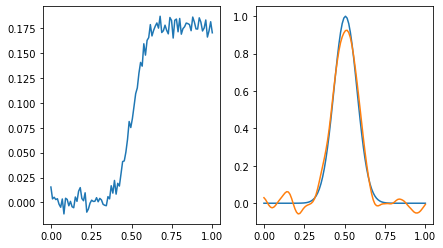

In [2]:
# a=1 ; p=1
T,tTT,tDD = MatrixGen(a=1,p=1,nx=100,method1='trapeze')
x,y,yd = DataGen(T,noise = 0.05)
x,xout = Solver(x,yd,(T,tTT,tDD),reg_inf=10**-10,reg_sup=10**-5)

err=3.873e-01, inf=1.000e-10, sup=1.000e-05, reg=1.000e-05
sup= 1e-05 , reg= 1e-05
Wrong regularization parameter, too low


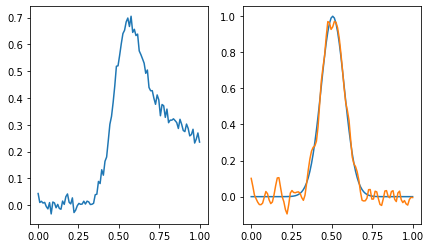

In [3]:
# a= 0.5 ; p=1
T,tTT,tDD = MatrixGen(a=0.5,p=1,nx=100,method1='trapeze')
x,y,yd = DataGen(T,noise = 0.05)
x,xout = Solver(x,yd,(T,tTT,tDD),reg_inf=10**-10,reg_sup=10**-5)

err=5.023e-01, inf=1.000e-10, sup=1.000e-05, reg=8.014e-08


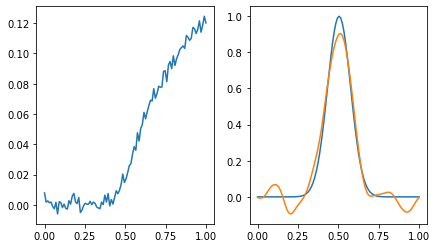

In [4]:
# a= 1.5 ; p=1
T,tTT,tDD = MatrixGen(a=1.5,p=1,nx=100,method1='trapeze')
x,y,yd = DataGen(T,noise = 0.05)
x,xout = Solver(x,yd,(T,tTT,tDD),reg_inf=10**-10,reg_sup=10**-5)

err=1.518e+00, inf=1.000e-10, sup=1.000e-08, reg=5.246e-09


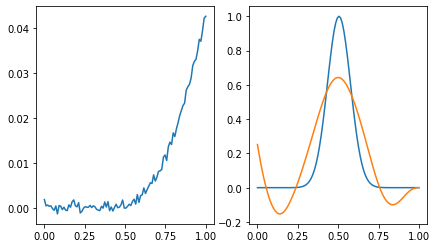

In [5]:
# a= 3 ; p=1
T,tTT,tDD = MatrixGen(a=3,p=1,nx=100,method1='trapeze',method2='inv')
x,y,yd = DataGen(T,noise = 0.05)
x,xout = Solver(x,yd,(T,tTT,tDD),reg_inf=10**-10,reg_sup=10**-8)

err=4.717e-01, inf=1.000e-12, sup=1.000e-10, reg=1.000e-10
sup= 1e-10 , reg= 1e-10
Wrong regularization parameter, too low


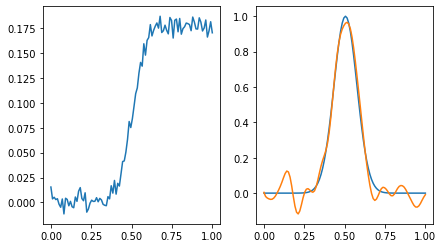

In [6]:
# a= 1 ; p=1 ; explicit difference finie en B
T,tTT,tDD = MatrixGen(a=1,p=1,nx=100,method1='trapeze',method2='explicit')
x,y,yd = DataGen(T,noise = 0.05)
x,xout = Solver(x,yd,(T,tTT,tDD),reg_inf=10**-12,reg_sup=10**-10)

## Element P0

Ce n'est pas vraiment une méthode éléments finis... 
On utilise seulement le principe de projection dans une base.
We project in the basis of element
$$
e_i(t) = \begin{cases}
        1/\sqrt{h} & t \in [ih,(i+1)h] \; , \\
        0 & \text{else} \; .
       \end{cases}
$$
and
$$ 
\langle e_i , e_j \rangle = \int_0^1 e_i(t) e_j(t) \mathrm{d} t = \delta_i^j \;.
$$

Pn calcule donc l'opérateur dans la base, 
ce qui donne pour $0 \leq j <i $
$$
\begin{split}
(\widetilde{T}_a)_{i,j}
& = \langle e_i , T_a e_j \rangle \\
& = \int_0^1 e_i (t) \int_0^t (t-s)^{a-1} e_j(s) \mathrm{d}s \mathrm{d} t \\
& = \int_0^1 e_i (t) \frac{1}{\sqrt{h}} \int_{jh}^{(j+1)h} (t-s)^{a-1} \mathrm{d}s \mathrm{d} t \\
& = \int_0^1 e_i (t) \frac{1}{a\sqrt{h}} [ (t-jh)^{a} - (t-(j+1)h)^{a}] \mathrm{d} t \\
& =  \frac{1}{ah} \int_{i}^{(i+1)h}[ (t-jh)^{a} - (t-(j+1)h)^{a}] \mathrm{d} t \\
& = \frac{1}{a(a+1)} h^a [ (i+1-j)^{a+1} - 2(i-j+1)^{a+1} + (i-j-1)^{a+1}]
\end{split}
$$
et pour $i = j$
$$
\begin{split}
(\widetilde{T}_a)_{i,i}
&= \langle e_i , T_a e_i \rangle \\
& =  \frac{1}{h} \int_{ih}^{(i+1)h} \int_{ih}^{t} (t-s)^{a-1} \mathrm{d}s \mathrm{d} t \\
& =  \frac{1}{ah} \int_{ih}^{(i+1)h}  (t-ih)^{a}  \mathrm{d} t \\
& =  \frac{1}{a(a+1)h}  \\
\end{split}
$$

Et enfin,
$$
(\widetilde{T}_a)_{i,j}
=
\begin{cases}
\; \displaystyle \frac{1}{a(a+1)} \frac{1}{n^a} 
     \left( (i-j+1)^{a+1} + (i-j-1)^{a+1} -2(i-j)^{a+1} \right) & i>j \; ,\\
     \\
\; \displaystyle \frac{1}{a(a+1)} \frac{1}{n^a}   &i=j  \; ,\\
\\
\; 0 & i<j \; .
\end{cases}
$$

Remarque : ici la dérivée de $e_i$ n'a pas de sens (donc pas de matrice de rigidité...). Pour B on est donc contraint de passer par l'inverse.
Donc aucune idée de comment calculer $B$, on prend l'inverse de $^TTT$ meme si cela n'a pas vraiement de sens.

err=3.485e-01, inf=1.000e-10, sup=1.000e-05, reg=9.856e-07


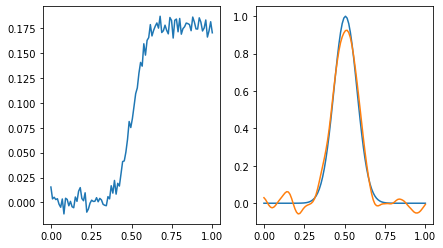

In [7]:
# a=1 ; p=1
T,tTT,tDD = MatrixGen(a=1,p=1,nx=100,method1='eltP0')
x,y,yd = DataGen(T,noise = 0.05)
x,xout = Solver(x,yd,(T,tTT,tDD),reg_inf=10**-10,reg_sup=10**-5)

err=3.938e-01, inf=1.000e-10, sup=1.000e-05, reg=1.000e-05
sup= 1e-05 , reg= 1e-05
Wrong regularization parameter, too low


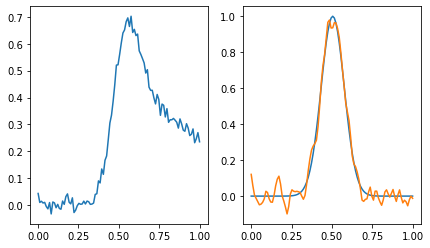

In [8]:
# a=0.5 ; p=1
T,tTT,tDD = MatrixGen(a=0.5,p=1,nx=100,method1='eltP0')
x,y,yd = DataGen(T,noise = 0.05)
x,xout = Solver(x,yd,(T,tTT,tDD),reg_inf=10**-10,reg_sup=10**-5)

/Users/ceciledv/Documents/HilbertScale/RegularisationHS/code/slope.py:113: RuntimeWarning: invalid value encountered in power
  D = np.diag(D**r)


err=1.000e+03, inf=1.000e-10, sup=1.000e-05, reg=0.000e+00


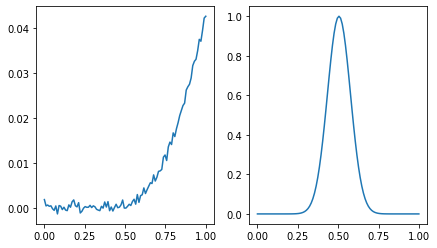

In [9]:
# a=3 ; p=1
T,tTT,tDD = MatrixGen(a=3,p=1,nx=100,method1='eltP0')
x,y,yd = DataGen(T,noise = 0.05)
x,xout = Solver(x,yd,(T,tTT,tDD),reg_inf=10**-10,reg_sup=10**-5)

## Power of matrix

On approxime $S x (t) = \int_0^t x(s) \mathrm{d} s$
par
$$
S = 
\begin{pmatrix}
1 & 0 & 0 & \cdots \\
1 & 1 & 0 & \cdots \\
\vdots & 1 & 1 & \cdots \\
1 & \cdots & 1 & 1
\end{pmatrix}
$$

Alors pour $a$ entier, $T_a = S^a$.
Pour la version fractionnaire on calcule avec $a=m+r$ et $r<1$, $T_{m+r} = S^m S^r$ 
et $S^r$ est approximé par l'algorithme de Shur-Paddé.

err=3.630e-01, inf=1.000e-10, sup=1.000e-05, reg=1.081e-06


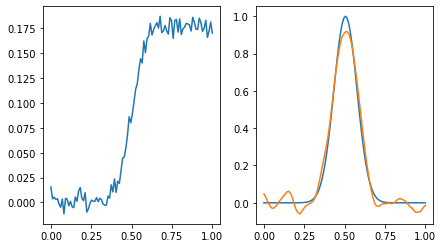

In [10]:
# a=1 ; p=1
T,tTT,tDD = MatrixGen(a=1,p=1,nx=100,method1='fracpower')
x,y,yd = DataGen(T,noise = 0.05)
x,xout = Solver(x,yd,(T,tTT,tDD),reg_inf=10**-10,reg_sup=10**-5)

In [11]:
# a=0.5 ; p=1
T,tTT,tDD = MatrixGen(a=0.5,p=1,nx=100,method1='fracpower')
x,y,yd = DataGen(T,noise = 0.05)
x,xout = Solver(x,yd,(T,tTT,tDD),reg_inf=10**-10,reg_sup=10**-5)

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
# a=3 ; p=1
T,tTT,tDD = MatrixGen(a=3,p=1,nx=100,method1='fracpower')
x,y,yd = DataGen(T,noise = 0.05)
x,xout = Solver(x,yd,(T,tTT,tDD),reg_inf=10**-10,reg_sup=10**-5)